# Run All

## Import and Load

Import library yang dibutuhkan

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

Mengubah Style

In [ ]:
rcParams['figure.figsize'] = 15, 8
mpl.style.use(['ggplot'])

Load Dataset

In [ ]:
df_producers_relation = pd.read_excel('https://drive.google.com/uc?id=16-5ODNyWU3hvnJoZUjdLrEeZWTQhgxO9')

Lihat Dataset

In [ ]:
df_producers_relation.head()

,id,pid,relation,p1_name,p2_name
0,p1,p266,par,Yamikumo-Communications,CD Bros.
1,p2,p266,par,Sekilala,CD Bros.
2,p3,p102,par,G-Collections,JAST USA
3,p3,p266,par,G-Collections,CD Bros.
4,p4,p5633,ipa,age,"ACID Co., Ltd."


Ukuran Dataset

In [ ]:
df_producers_relation.shape

(5086, 5)

Info Dataset

In [ ]:
df_producers_relation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5086 entries, 0 to 5085
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        5086 non-null   object
 1   pid       5086 non-null   object
 2   relation  5086 non-null   object
 3   p1_name   5086 non-null   object
 4   p2_name   5086 non-null   object
dtypes: object(5)
memory usage: 198.8+ KB


## Model Graf

Membuat Graf

In [ ]:
p_graph = nx.Graph()

for i in range(len(df_producers_relation)):
  p_graph.add_edge(df_producers_relation['p1_name'][i], df_producers_relation['p2_name'][i])

Visualisasi Graf. Waktu Run sekitar 40 detik

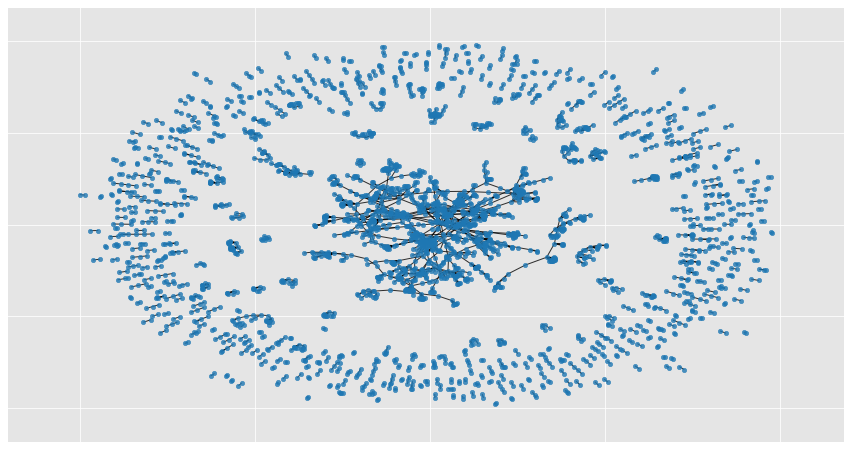

In [ ]:
nx.draw_networkx(p_graph, node_size=20, width=1, alpha=0.8, with_labels=False)
plt.show()

## Perhitungan Centrality

### Degree Centrality

Menggunakan degree_centrality()

In [ ]:
nilai_degree = nx.degree_centrality(p_graph)
nilai_degree = dict(sorted(nilai_degree.items(), key=lambda item: item[1],reverse=True))
# print(nilai_centrality)

Hasil menjadi Dataframe

In [ ]:
list_influence = list(nilai_degree.keys())
list_nilai = list(nilai_degree.values())

df_degree = pd.DataFrame({'Top by Degree' : list_influence, 'Degree Centrality' : list_nilai})
df_degree.head(10)

,Top by Degree,Degree Centrality
0,VISUAL ARTS,0.021821
1,WillPlus,0.013297
2,Nexton,0.009206
3,Hobibox,0.007501
4,Giga,0.006478
5,"Space Project Co., Ltd.",0.006478
6,CD Bros.,0.006137
7,"Interheart Co., Ltd.",0.005796
8,PRODUCTION PENCIL,0.005114
9,MasterUp,0.005114


### Betweenness Centrality

Menggunakan betweenness_centrality(). Perkiraaan 11 detik

In [ ]:
nilai_betweenness = nx.betweenness_centrality(p_graph)
nilai_betweenness = dict(sorted(nilai_betweenness.items(), key=lambda item: item[1],reverse=True))
# print(nilai_centrality)

Hasil menjadi Dataframe

In [ ]:
list_influence = list(nilai_betweenness.keys())
list_nilai = list(nilai_betweenness.values())

df_betweenness = pd.DataFrame({'Top by Betweenness' : list_influence, 'Betwenness Centrality' : list_nilai})
df_betweenness.head(10)

,Top by Betweenness,Betwenness Centrality
0,VISUAL ARTS,0.028919
1,Hobibox,0.026658
2,Nexton,0.021444
3,IDES,0.016557
4,"F&C Co., Ltd.",0.016385
5,"STONE HEADS Co., Ltd.",0.015169
6,Kirara,0.014513
7,CRAFTWORK,0.013393
8,PIL,0.013320
9,Yumemiru,0.013249


### Eigenvector Centrality

Menggunakan eigenvector_centrality()

In [ ]:
nilai_eigenvector = nx.eigenvector_centrality(p_graph)
nilai_eigenvector = dict(sorted(nilai_eigenvector.items(), key=lambda item: item[1],reverse=True))
# print(nilai_centrality)

Hasil menjadi Dataframe

In [ ]:
list_influence = list(nilai_eigenvector.keys())
list_nilai = list(nilai_eigenvector.values())

df_eigenvector = pd.DataFrame({'Top by Eigenvector' : list_influence, 'Eigenvector Centrality' : list_nilai})
df_eigenvector.head(10)

,Top by Eigenvector,Eigenvector Centrality
0,VISUAL ARTS,0.700779
1,Visual Art's Motto,0.111279
2,ZERO,0.111079
3,PROTOTYPE,0.101686
4,Softhouse Bonbee Bonbon,0.100301
5,Visual Art's MottoSP,0.100115
6,Studio Ring,0.100091
7,Miyabi,0.100091
8,Bonbee!,0.098762
9,CRAFTWORK,0.089128


## Influential Akhir

Menggabungkan ketiga hasil centrality

In [ ]:
df_influential = pd.concat([df_degree.head(10), df_betweenness.head(10), df_eigenvector.head(10)], axis=1)
df_influential

,Top by Degree,Degree Centrality,Top by Betweenness,Betwenness Centrality,Top by Eigenvector,Eigenvector Centrality
0,VISUAL ARTS,0.021821,VISUAL ARTS,0.028919,VISUAL ARTS,0.700779
1,WillPlus,0.013297,Hobibox,0.026658,Visual Art's Motto,0.111279
2,Nexton,0.009206,Nexton,0.021444,ZERO,0.111079
3,Hobibox,0.007501,IDES,0.016557,PROTOTYPE,0.101686
4,Giga,0.006478,"F&C Co., Ltd.",0.016385,Softhouse Bonbee Bonbon,0.100301
5,"Space Project Co., Ltd.",0.006478,"STONE HEADS Co., Ltd.",0.015169,Visual Art's MottoSP,0.100115
6,CD Bros.,0.006137,Kirara,0.014513,Studio Ring,0.100091
7,"Interheart Co., Ltd.",0.005796,CRAFTWORK,0.013393,Miyabi,0.100091
8,PRODUCTION PENCIL,0.005114,PIL,0.013320,Bonbee!,0.098762
9,MasterUp,0.005114,Yumemiru,0.013249,CRAFTWORK,0.089128


Export ke Excel

In [70]:
df_influential.to_excel(r'vn-producer-influencer.xlsx', index=False, header=True)

## Statistik

In [ ]:
print("Banyaknya Nodes = ", p_graph.number_of_nodes())
print("Banyaknya Edges = ", p_graph.number_of_edges())

Banyaknya Nodes =  2934
Banyaknya Edges =  2543
